In [2]:
# import libraries
import tweepy
import json
import pandas as pd
import requests 
import os 
from timeit import default_timer as timer
from datetime import datetime,timedelta

In [3]:
# Before assess, make a copy of these 3 data sets
pd_achive = pd.read_csv('twitter-archive-enhanced.csv')
# pd_achive['tweet_id'].values   # return an array 
pd_achive_copy_1 = pd_achive.copy()

# define folder name first
import os
folder_name = "/Users/ariawang/Desktop/twitter project"
pd_predictions = pd.read_csv(os.path.join(folder_name, 'image-predictions.tsv'), sep='\t')
pd_predictions_copy_1 = pd_predictions.copy()

# read in json file into panda dataframe, store in RAM
pd_json = pd.read_json(os.path.join(folder_name, 'tweet-json.txt'), lines=True)
pd_json = pd_json[['id','retweet_count','favorite_count']]
pd_json_copy_1 = pd_json.copy()

#display first few rows
pd_achive_copy_1.head()

#Pandas does not have a built-in database. 
#The code reads data from 'image-predictions.tsv' into a Pandas DataFrame (pd_predictions), 
#which is stored in memory (RAM), not in a database.

#If you modify the DataFrame, the original file remains unchanged, 
#unless you explicitly save the modified DataFrame back to the file.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
pd_predictions_copy_1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
pd_json_copy_1.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [6]:
pd_achive_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
pd_achive_copy_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
pd_achive_copy_1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [68]:
# Drop duplicate tweet IDs, keeping the first occurrence
# pd_achive_copy = pd_achive_copy.drop_duplicates(subset='tweet_id', keep='first')
# filter the DataFrame. It selects only the rows where the retweeted_status_id is not null 
#(i.e., tweets that are retweets)

pd_achive_copy[pd_achive_copy['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [9]:
pd_predictions_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
pd_predictions_copy_1.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [11]:
pd_predictions_copy_1.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [12]:
pd_json_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [13]:
pd_json_copy_1.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [14]:
pd_json_copy_1.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

In [15]:
pd_json_copy_1.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Part 1: Quality issue (Content Issues)

pd_achive_copy, pd_prediction_copy:

remove extra contents for urls in source column ( eg: <a href= )
chop extra contents for timestamp column (+0000)
Under name column, multiple expressions for missing names : a/an/the/none for
Erroneous datatypes :
tweet_id,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
all should be string not float ;
'img_num', 'retweet_count', 'favorite_count' should be integer not float
when there are two fractions in the text, the rating goes with the first one, which is not always correct. ( 835000000000000000 , 666000000000000000 , 835000000000000000 )
some rating are not relevant.(832000000000000000 , 811000000000000000 : : date versus rating , missing rating )
some of the tweets are not original tweets.
"doggo,floofer, pupper,puppo" in pd_achive_copy table are values under one column "stage"
The values under columns p_1 , p_2, p_3 should not have "_" in the breads ( Irish_terrier)
"tweet_id" is named "id" in pd_json_copy table ( This one I did before fixing tidiness issues

# Part 2: Tidiness Issues ( Structure Issues)

pd_prediction_copy and pd_json_copy tables are part of pd_achive_copy table
rating_numerator and rating_denominator should be one column rating
"doggo,floofer, pupper,puppo" in pd_achive_copy are values under type column , should not be separate column names
split date and time into two separate columns

In [16]:
#rename pd_json_copy "id" column by "tweet_id" . This one is not tidiness issue 
#but we have to make the column names consistent in order to merge in the second cleaning step
# not tidiness issue. But solve it first for merging tables later
pd_json_copy_1.rename(index=str, columns = {'id':'tweet_id'},inplace=True)
pd_json_copy_1.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [19]:
###part 1: fix tidiness issue

#pd_predictions_copy and pd_json_copy tables are part of pd_achive_copy table. 
#Merge three tables by using merge() function
pd_achive_copy_1 = pd.merge(pd_achive_copy_1,pd_predictions_copy_1,on = 'tweet_id' ,how = 'left')
pd_achive_copy_1 = pd.merge(pd_achive_copy_1,pd_json_copy_1,on = 'tweet_id' ,how = 'left')
#test
pd_achive_copy_1.columns
pd_achive_copy_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


In [20]:
#rating_numerator and rating_denominator should be merged into one column rating
# add a new column rating into the dataframe by combining rating_numerator and rating_denominator
#The columns rating_numerator and rating_denominator are originally integers (int64).
#If you try to concatenate integers directly, Python will throw an error.

#Converting them to str ensures that they can be combined (concatenated) with "/" to form a string.
pd_achive_copy_1['rating'] = pd_achive_copy_1['rating_numerator'].astype(str) +"/" + pd_achive_copy_1['rating_denominator'].astype(str)
pd_achive_copy_1 = pd_achive_copy_1.drop(['rating_numerator', 'rating_denominator'],axis=1)  # drop only need the columns' by use axis=1
pd_achive_copy_1['rating']

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: rating, Length: 2356, dtype: object

In [21]:
pd_achive_copy_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'rating'],
      dtype='object')

In [22]:
#"doggo,floofer, pupper,puppo" in pd_achive_copy table are values under one column "stage" 
#by using lambda to join them together and replace the value types with proper values .

#This code combines the values from the four columns (doggo, floofer, pupper, puppo) into a single column called stage.

#The apply(lambda x: ''.join(x), axis=1) function:

#axis=1 means the operation is performed row-wise (across columns).

#''.join(x) concatenates all values in the row without spaces or separators.

#then Replacing Unwanted "None" Values

#The replace() function ensures that:

#"NoneNoneNoneNone" → "None" (meaning no dog stage).

#"doggoNoneNoneNone" → "doggo", and so on.

#Some tweets contain multiple dog stages (e.g., "doggo" and "pupper" together).

#These cases are labeled as "multiple" to indicate multiple dog stages.

pd_achive_copy_1['stage'] = pd_achive_copy_1[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

# for single one stage 
pd_achive_copy_1['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
pd_achive_copy_1['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
pd_achive_copy_1['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
pd_achive_copy_1['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
pd_achive_copy_1['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True) 

# for multiple stages 
pd_achive_copy_1['stage'].replace("doggoNonepupperNone","multiple", inplace=True) 
pd_achive_copy_1['stage'].replace("doggoNoneNonepuppo","multiple", inplace=True) 
pd_achive_copy_1['stage'].replace("doggoflooferNoneNone","multiple", inplace=True) 

#test
pd_achive_copy_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,13/10,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,13/10,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,12/10,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,13/10,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,12/10,None


In [23]:
# comfirm the number and stage with value_counts()
pd_achive_copy_1.stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: stage, dtype: int64

In [28]:
pd_achive_copy_1['date'] , pd_achive_copy_1['time'] = pd_achive_copy_1['timestamp'].str.split(' ',1).str
pd_achive_copy_1['date'] = pd_achive_copy_1['date'].replace('-','')
pd_achive_copy_1['time'] = pd_achive_copy_1['time'].replace(':','')

#chop "+0000" off from timestamp column with rstrip() in pd_achive_copy table
pd_achive_copy_1[['date','time']].head()

/var/folders/g9/xnzml8xd4wg8w7_fx6nq6nk00000gn/T/ipykernel_17694/1562930195.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  pd_achive_copy_1['date'] , pd_achive_copy_1['time'] = pd_achive_copy_1['timestamp'].str.split(' ',1).str


,date,time
0,2017-08-01,16:23:56 +0000
1,2017-08-01,00:17:27 +0000
2,2017-07-31,00:18:03 +0000
3,2017-07-30,15:58:51 +0000
4,2017-07-29,16:00:24 +0000


In [29]:
### part 2: fix quality issue
pd_achive_copy_1['source'].head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

In [31]:
# Remove extra parts of urls in source column using split() function
#pd_achive_copy_1['source'][0].split('"')[1::2][0]

#for i in range(len(pd_achive_copy_1['source'])):
    #pd_achive_copy_1['source'][i] = pd_achive_copy_1['source'][i].split('"')[1::2][0]
    # [1::2] slicing to get odd values 
    # [0] get the first value after slicing 
# better way: pd_achive_copy['source'] = pd_achive_copy['source'].apply(lambda x: x.split('"')[1::2][0])

pd_achive_copy_1['source'].head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

In [33]:
pd_achive_copy_1.time_1 = pd_achive_copy_1.time.str.rstrip('+0000')
pd_achive_copy_1 = pd_achive_copy_1.drop( columns = ['timestamp'] , axis=1) 
pd_achive_copy_1[['date','time']].head()

/var/folders/g9/xnzml8xd4wg8w7_fx6nq6nk00000gn/T/ipykernel_17694/713165512.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pd_achive_copy_1.time_1 = pd_achive_copy_1.time.str.rstrip('+0000')


,date,time
0,2017-08-01,16:23:56 +0000
1,2017-08-01,00:17:27 +0000
2,2017-07-31,00:18:03 +0000
3,2017-07-30,15:58:51 +0000
4,2017-07-29,16:00:24 +0000


In [34]:
#Multiple expressions for missing values under name column in pd_achive_copy table
#Replace " a, an, the " with none
faulty_name = ['a','an','the','light','life','by','actually','just','getting','infuriating','old','all','this','very',
              'mad','not','one','my','O','quite','such']
pd_achive_copy_1['name'] = pd_achive_copy_1['name'].replace( faulty_name , 'none' )  
pd_achive_copy_1['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        none
2353        none
2354        none
2355        None
Name: name, Length: 2356, dtype: object

In [35]:
#Fix data types issues:
#change 'img_num', 'retweet_count', 'favorite_count' from float to integer
#change tweet_id,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id from float to integer

# why? Why Convert from float to integer?
#These columns represent IDs, which are unique whole numbers/represent counts
pd_achive_copy_1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
jpg_url                        object
img_num                       float64
p1                             object
p1_conf                       float64
p1_dog                         object
p2                             object
p2_conf                       float64
p2_dog                         object
p3                             object
p3_conf                       float64
p3_dog                         object
retweet_count                 float64
favorite_cou

In [37]:
import numpy as np
# convert multiple columns from float to integer at one time 
# but need to consider nan
list_counts = [ 'img_num', 'retweet_count', 'favorite_count']
pd_achive_copy_1[list_counts] = pd_achive_copy_1[list_counts].fillna(0.0).applymap(np.int64)

list_ids = ['tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
pd_achive_copy_1[list_ids] = pd_achive_copy_1[list_ids].astype(str)
#str is object type

In [90]:
pd_achive_copy.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
jpg_url                        object
img_num                       float64
p1                             object
p1_conf                       float64
p1_dog                         object
p2                             object
p2_conf                       float64
p2_dog                         object
p3                             object
p3_conf                       float64
p3_dog      

In [38]:
#when there are two fractions in the text, the rating goes with the first one, which is not always correct or slicing the wrong friction
#(835000000000000000 replace 960/0 with 13/10 ,
#666000000000000000 replace 1/2 with 9/10 ,
#832000000000000000 replace '75/10' with'9.75/10'),
#716000000000000000 replace 50/50 with " 11/10"
pd_achive_copy_1['rating'] = pd_achive_copy_1['rating'].replace('960/0','13/10')
pd_achive_copy_1['rating'] = pd_achive_copy_1['rating'].replace('1/2','9/10')
pd_achive_copy_1['rating'] = pd_achive_copy_1['rating'].replace('75/10','9.75/10')
pd_achive_copy_1['rating'] = pd_achive_copy_1['rating'].replace('50/50','11/10')


In [39]:
#some rating are not relevant.( date versus rating , 811000000000000000 )

pd_achive_copy_1['rating'] = pd_achive_copy_1['rating'].replace('24/7','none')


In [93]:
#remove retweets by drop the rows when the values of retweet_ids are not none, only count original

pd_achive_copy[pd_achive_copy['retweeted_status_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,date,time
0,892420643555336193,NaN,NaN,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,0.085851,False,banana,0.076110,False,8853.0,39467.0,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,0.090647,True,papillon,0.068957,True,6514.0,33819.0,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,0.168086,True,spatula,0.040836,False,8964.0,42908.0,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,None,2017-07-29,16:00:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,...,0.243682,True,Doberman,0.154629,True,41.0,111.0,None,2015-11-16,00:24:50
2352,666044226329800704,NaN,NaN,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,...,0.360687,True,miniature_pinscher,0.222752,True,147.0,311.0,None,2015-11-16,00:04:52
2353,666033412701032449,NaN,NaN,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,...,0.138584,True,bloodhound,0.116197,True,47.0,128.0,None,2015-11-15,23:21:54
2354,666029285002620928,NaN,NaN,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,48.0,132.0,None,2015-11-15,23:05:30


In [40]:
# sample : df.drop(df[df.score < 50].index, inplace=True)
pd_achive_copy_1.drop(pd_achive_copy_1[pd_achive_copy_1['retweeted_status_id'] != 'nan'].index , inplace=True )
# DataFrame.index : return The index (row labels) of the DataFrame.
# here notnull() does not work for me 

#'nan' is a string in your dataset instead of an actual NaN (missing value).

#notnull() only works for real NaN values (float('nan') or None), not string "nan".

In [41]:
pd_achive_copy_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time
0,892420643555336193,nan,nan,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,...,False,banana,0.076110,False,8853,39467,13/10,None,2017-08-01,16:23:56 +0000
1,892177421306343426,nan,nan,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,...,True,papillon,0.068957,True,6514,33819,13/10,None,2017-08-01,00:17:27 +0000
2,891815181378084864,nan,nan,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,...,True,kelpie,0.031379,True,4328,25461,12/10,None,2017-07-31,00:18:03 +0000
3,891689557279858688,nan,nan,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,...,True,spatula,0.040836,False,8964,42908,13/10,None,2017-07-30,15:58:51 +0000
4,891327558926688256,nan,nan,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,...,True,German_short-haired_pointer,0.175219,True,9774,41048,12/10,None,2017-07-29,16:00:24 +0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248...,None,...,True,Doberman,0.154629,True,41,111,5/10,None,2015-11-16,00:24:50 +0000
2352,666044226329800704,nan,nan,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226...,none,...,True,miniature_pinscher,0.222752,True,147,311,6/10,None,2015-11-16,00:04:52 +0000
2353,666033412701032449,nan,nan,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412...,none,...,True,bloodhound,0.116197,True,47,128,9/10,None,2015-11-15,23:21:54 +0000
2354,666029285002620928,nan,nan,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,none,...,True,Rhodesian_ridgeback,0.072010,True,48,132,7/10,None,2015-11-15,23:05:30 +0000


In [43]:
# remove the "_" in the values under p1 , p2 , p3 columns with replace()
#name_list = ['p1', 'p2', 'p3' ]
#pd_achive_copy[name_list] = pd_achive_copy[name_list].replace('_',' ')  why not work ???
pd_achive_copy_1['p1'] = pd_achive_copy_1['p1'].str.replace('_', ' ')
pd_achive_copy_1['p2'] = pd_achive_copy_1['p2'].str.replace('_', ' ')
pd_achive_copy_1['p3'] = pd_achive_copy_1['p3'].str.replace('_', ' ')
pd_achive_copy_1[['p1', 'p2', 'p3']] 

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper towel,Labrador retriever,spatula
4,basset,English springer,German short-haired pointer
...,...,...,...
2351,miniature pinscher,Rottweiler,Doberman
2352,Rhodesian ridgeback,redbone,miniature pinscher
2353,German shepherd,malinois,bloodhound
2354,redbone,miniature pinscher,Rhodesian ridgeback


In [44]:
# save the clean data 
pd_achive_copy_1.to_csv('twitter_archive_master.csv',index=False)

# Visulize and Analyze the Data

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
import seaborn as sb 

In [46]:
pd_achive_clean = pd.read_csv('twitter_archive_master.csv')

In [47]:
pd_achive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time
0,892420643555336193,NaN,NaN,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,...,False,banana,0.076110,False,8853,39467,13/10,None,2017-08-01,16:23:56 +0000
1,892177421306343426,NaN,NaN,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,...,True,papillon,0.068957,True,6514,33819,13/10,None,2017-08-01,00:17:27 +0000
2,891815181378084864,NaN,NaN,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,...,True,kelpie,0.031379,True,4328,25461,12/10,None,2017-07-31,00:18:03 +0000
3,891689557279858688,NaN,NaN,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,...,True,spatula,0.040836,False,8964,42908,13/10,None,2017-07-30,15:58:51 +0000
4,891327558926688256,NaN,NaN,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,...,True,German short-haired pointer,0.175219,True,9774,41048,12/10,None,2017-07-29,16:00:24 +0000


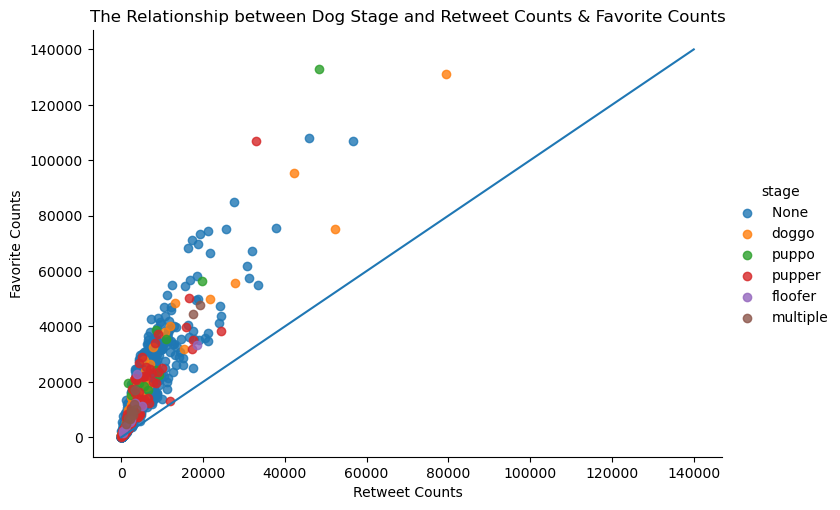

In [49]:
# explore
# Does dog stage ('doggo','floofer', 'pupper', 'puppo') have correlation with favorite_count and retweet_count ?
# Does the timestamp have relation with favorite_count and retweet_count ?
# What are the top breads ?

#What is the relationship between dog stages and retweet counts and favorite counts ?
g = sb.FacetGrid(data = pd_achive_clean , hue = 'stage' , height = 5 , aspect = 1.5)
g = g.map( sb.regplot, 'retweet_count', 'favorite_count',  x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.title('The Relationship between Dog Stage and Retweet Counts & Favorite Counts')
plt.plot([0, 140000], [0, 140000], '-')

#Uses FacetGrid to color data points by dog stage.
#Plots retweet_count_y vs. favorite_count_y using regplot (scatterplot).
#Adds jitter (x_jitter=0.04) to prevent point overlap.
#Adds a diagonal reference line (y = x) to compare retweets vs. favorites.

Conclusion: According to my plot, most of the retweet are below 40000 and most of the favorite count are below 80000. No matter what stage it is, there seems to be more favorite counts than retweet counts, which is understandable. An interesting finding is that doggo, puppo and pupper seem to gain more retweets and favorite counts. Dog stage is very likely a factor affecting the retweet counts and favorite counts.

In [50]:
pd_achive_clean[['date','time']].head()

,date,time
0,2017-08-01,16:23:56 +0000
1,2017-08-01,00:17:27 +0000
2,2017-07-31,00:18:03 +0000
3,2017-07-30,15:58:51 +0000
4,2017-07-29,16:00:24 +0000


In [51]:
# I just need the hour of time column to see the infulence 
pd_achive_clean['time'] = pd.DatetimeIndex(pd_achive_clean['time']).hour

In [52]:
pd_achive_clean['time'].head()

0    16
1     0
2     0
3    15
4    16
Name: time, dtype: int64

Text(0, 0.5, 'Number of Tweets Posted')

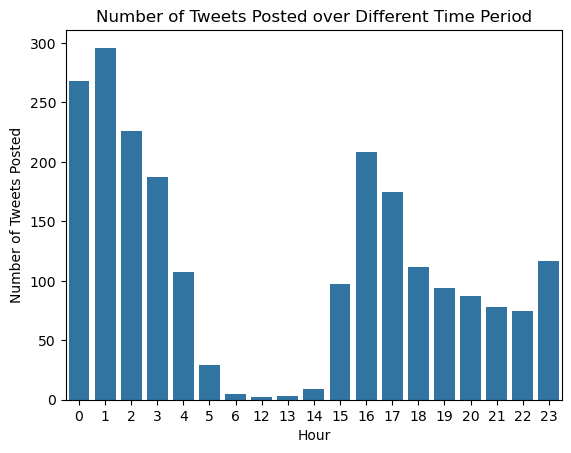

In [53]:
# At what time people tend to post tweets ?
base_color = sb.color_palette()[0]
sb.countplot(data = pd_achive_clean ,  x = 'time' , color = base_color )
plt.title('Number of Tweets Posted over Different Time Period')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets Posted')

Text(0.5, 1.0, 'The Relationship between Time and Retweet Counts & Favorite Counts')

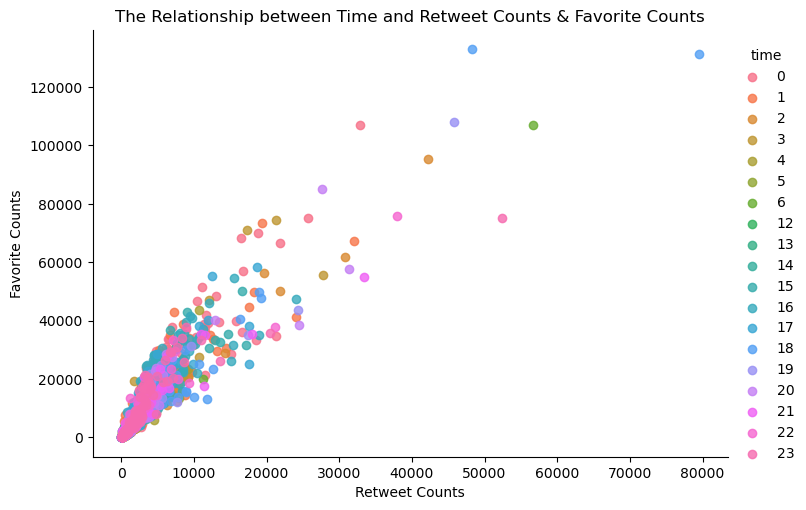

In [54]:
# plot the relationship between time and retweet & favorite counts 
g = sb.FacetGrid(data = pd_achive_clean , hue = 'time', height = 5 , aspect = 1.5 )
g = g.map( sb.regplot, 'retweet_count', 'favorite_count',  x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.title('The Relationship between Time and Retweet Counts & Favorite Counts')

Conclusion 2:

According to the plot, we can see there are two activity peaks 0-3 and 16-17. Users like to post tweets either at the time before off work or late night(even 3 am belongs to early morning but It is more likely they stay late until 3 am rather than they get up at 3 am to post tweets).

It is shown that tweets posted at evening time or late night gains more retweets and favorites. It is generally consistent with the two activity peaks. More users are active at the peorids, which generate more retweets and favorite counts.

In [55]:
#What are the top breeds 

# next let's condense the dog breed analysis
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)
      
    # this isn't about the parsing AI so the rest of this data is deletable

pd_achive_clean.apply(breed_confidence, axis=1)
pd_achive_clean['breed'] = breed
pd_achive_clean['confidence'] = confidence
pd_achive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time,breed,confidence
0,892420643555336193,NaN,NaN,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,...,0.076110,False,8853,39467,13/10,None,2017-08-01,16,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,...,0.068957,True,6514,33819,13/10,None,2017-08-01,0,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,...,0.031379,True,4328,25461,12/10,None,2017-07-31,0,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,...,0.040836,False,8964,42908,13/10,None,2017-07-30,15,Labrador retriever,0.168086
4,891327558926688256,NaN,NaN,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,...,0.175219,True,9774,41048,12/10,None,2017-07-29,16,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,NaN,NaN,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,None,...,0.154629,True,41,111,5/10,None,2015-11-16,0,miniature pinscher,0.560311
2171,666044226329800704,NaN,NaN,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,none,...,0.222752,True,147,311,6/10,None,2015-11-16,0,Rhodesian ridgeback,0.408143
2172,666033412701032449,NaN,NaN,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,none,...,0.116197,True,47,128,9/10,None,2015-11-15,23,German shepherd,0.596461
2173,666029285002620928,NaN,NaN,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,none,...,0.072010,True,48,132,7/10,None,2015-11-15,23,redbone,0.506826


Text(0, 0.5, 'Breed')

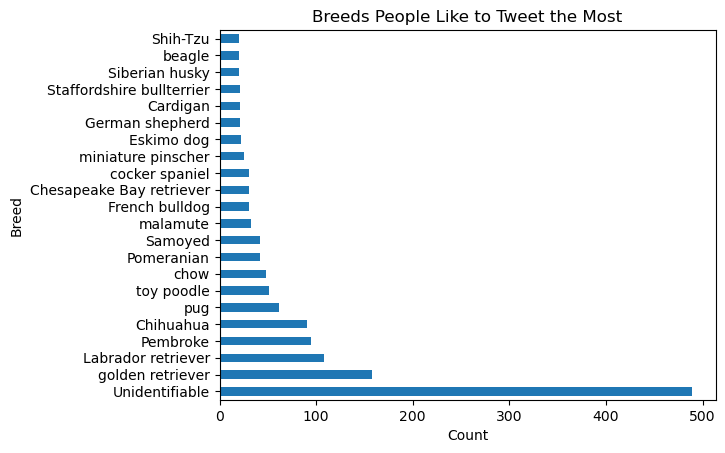

In [58]:
top_breeds=pd_achive_clean.groupby('breed').filter(lambda x: len(x) >= 20)
top_breeds['breed'].value_counts().plot(kind = 'barh')
plt.title('Breeds People Like to Tweet the Most')
plt.xlabel('Count')
plt.ylabel('Breed')

#Groups the dataset by the breed column. 
#This means that all the rows (tweets) associated with the same breed will be grouped together.

Conclusion 3 : There is a large number of unidentifiable breed. I tried to investigate the reasons. One reason is that the picture has nothing to do with dogs. They are totally unrelated tweets. The top 3 popular tweeted breeds are golden retriever , labrador retriever and pembroke.